In [170]:
from helper import *
from data import *
from models import *

%matplotlib inline 
# import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 

pd.set_option('display.max_rows', 100)    
pd.set_option('display.max_colwidth', 100)    

%load_ext autoreload
%autoreload 2

data_path = os.getcwd() + "/data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
train_df.sample(n=100)

,s1,s2,label
714033,我 今天 充值 的 话费 一 个 50 元 到 帐 另 一 个 100 元 为什么 现在 还 沒 到 帐,公安 网 无 基准 照片 怎么 解决,1
933261,与 银行 预留 手机号 不 一致,今天 能 配送 吗,0
82925,刷脸 老是 不 成功 怎么办,任性 付刷 脸 老 失败,2
442054,怎么 突然 没有 到付 选择 了,先 送货 再 付款 吗,2
675249,我 想 延迟 发货 应该 怎样 操作 啊,能 不 能 帮我 补下 差价,0
398257,支付 密码 是 可以 更改 的 是 吧,油烟 机 安装 需要 换个 地址 安装,0
138388,试用 活动 结束 后 试用 审核 多久 出来 呢,申请 免费 试用 怎么 操作,1
911392,为什么 任性 贷 账单 没有 了,普通 背景墙 安装 怎么 收费,0
245583,我的 机身 是 佳能 的 卡口 怎么 选择 镜头,相机 如何 搭配 镜头,2
65527,保修期 内 人为 原因 造成 损坏 报修 怎么 收费 的,我 那 任性 贷 一直 显示 额度 计算 中,0


## DATA

In [175]:
kb = pd.read_csv(os.path.join(data_path,'kb_parsed_tokenized.csv'))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 3: invalid start byte

In [173]:
f = os.path.join(data_path, "kb_question.csv")
if os.path.exists(f):
    kb_question = pd.read_csv(f)
else:
    kb_question = read_kb(data_path)
    kb_question.to_csv(os.path.join(data_path, 'kb_question.csv'), index=False, encoding='utf-8-sig')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 3: invalid start byte

In [3]:
train, dev, test = np.split(kb_question.sample(frac=1), [int(.8*len(kb_question)), int(.9*len(kb_question))])

In [4]:
if not os.path.exists(os.path.join(data_path,'train.csv')):
    train_df = create_pair_data(train)
    train_df.to_csv(os.path.join(data_path,'train.csv'), index=False, header=False, encoding='utf_8_sig')
else:
    train_df = pd.read_csv(os.path.join(data_path,'train.csv'), header=None)
    train_df.columns = ['s1', 's2', 'score']
    
if not os.path.exists(os.path.join(data_path,'dev.csv')):
    dev_df = create_pair_data(dev)
    dev_df.to_csv(os.path.join(data_path,'dev.csv'), index=False, header=False, encoding='utf_8_sig')
else:
    dev_df = pd.read_csv(os.path.join(data_path,'dev.csv'), header=None)
    dev_df.columns = ['s1', 's2', 'score']
    
if not os.path.exists(os.path.join(data_path,'test.csv')):
    test_df = create_pair_data(test)
    test_df.to_csv(os.path.join(data_path,'test.csv'), index=False, header=False, encoding='utf_8_sig')
else:
    test_df = pd.read_csv(os.path.join(data_path,'test.csv'), header=None)
    test_df.columns = ['s1', 's2', 'score']

In [87]:
# def convert(x):
#     if x==0:
#         return 0
#     if x==3:
#         return 1
#     if x==5:
#         return 2
# train_df['score'] = train_df['score'].apply(lambda x: convert(x) )

In [98]:
train, dev, test = get_nl(data_path)

processing /home/tingchunyeh/Sentence_sim/data/train.csv ...
** TRAIN DATA : Found 943409 pairs of train sentences.
processing /home/tingchunyeh/Sentence_sim/data/dev.csv ...
** DEV DATA : Found 108944 pairs of dev sentences.
processing /home/tingchunyeh/Sentence_sim/data/test.csv ...
** TEST DATA : Found 108949 pairs of test sentences.


In [8]:
txt = np.append(train['s1'], train['s2'])

In [9]:
wv, default_wv = build_vocab(txt, "w2v-model.txt")

Found 4141(/8127) words with w2v vectors
vocab size: 8127


In [10]:
test_vec1 = "苏宁 易 购 所 出售 的 商品 均 为 正品 行货 均 来自 正规 渠道 带 正规 机 打 发票 享受 国家 三 包 服务 质量 和 售后 服务 与 门店 完全 相同 请您 放心 选购"
test_vec2 =  "苏宁 易 购 所 出售 的 商品 均 为 正品 行货 请您 放心 选购"
test_vec3 = "有 统一 的 全 国 售后 服务 正品 质量 保证"
test_vec4 = "所有 货物 都 是 正品 请 安心 购买"
test_vec5 = "正规 发票 服务 完全 相同 放心 享受 服务"

## TF-IDF

In [104]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [9]:
def TF_IDF_train(txt, min_df=5):
    tf = TfidfVectorizer(norm=None,  min_df=min_df)
    txt_fitted = tf.fit(txt)
#     txt_transformed = txt_fitted.transform(txt)
    idf = dict(zip(txt_fitted.get_feature_names(), tf.idf_))
    
#     feature_names = np.array(tf.get_feature_names())
#     sorted_by_idf = np.argsort(tf.idf_)
#     print("Features with lowest idf:\n{}".format(
#            feature_names[sorted_by_idf[:10]]))
#     print("\nFeatures with highest idf:\n{}".format(
#            feature_names[sorted_by_idf[-10:]]))
    
    return txt_fitted, idf

In [10]:
def TF_IDF_predict(s1, s2):
    tfidf1 = txt_fitted.transform([s1])
    tfidf2 = txt_fitted.transform([s2])
    return cosine_similarity(tfidf1, tfidf2)[0][0]

In [11]:
txt_fitted, idf = TF_IDF_train(txt)
print("Vocabulary size: {}".format(len(idf)))

Vocabulary size: 7253


In [12]:
print(TF_IDF_predict(test_vec1, test_vec2))
print(TF_IDF_predict(test_vec1, test_vec3))
print(TF_IDF_predict(test_vec1, test_vec4))
print(TF_IDF_predict(test_vec1, test_vec5))

0.6219301141946278
0.2805170668176319
0.08363709181872489
0.6747714997693003


## Avg word embedding

In [13]:
def avg_embedding(sentence):
    res = np.zeros(300)
    count = 0
    for w in sentence.split():
        cur = wv[w] if w in wv else default_wv
        res = np.add(res, cur)
        count += 1
    return res/count

In [14]:
def avg_embedding_predict(s1, s2):
    avg_embed1 = avg_embedding(s1)
    avg_embed2 = avg_embedding(s2)
    return cosine_similarity([avg_embed1], [avg_embed2])[0][0]

In [15]:
print(avg_embedding_predict(test_vec1, test_vec2))
print(avg_embedding_predict(test_vec1, test_vec3))
print(avg_embedding_predict(test_vec1, test_vec4))
print(avg_embedding_predict(test_vec1, test_vec5))

0.7411203333560564
0.7672829470894322
0.5854888650981522
0.8062793732862193


## IDF word embedding

In [16]:
def IDF_embedding(sentence):
    res = np.zeros(300)
    count = 0
    for w in sentence.split():
        if w in wv:
            cur = wv[w]*idf[w] if w in idf else wv[w] 
        else:
            cur = default_wv
        res = np.add(res, cur)
        count += 1
    return res/count

In [17]:
def IDF_embedding_predict(s1, s2):
    IDF_embed1 = IDF_embedding(s1)
    IDF_embed2 = IDF_embedding(s2)
    return cosine_similarity([IDF_embed1], [IDF_embed2])[0][0]

In [18]:
print(IDF_embedding_predict(test_vec1, test_vec2))
print(IDF_embedding_predict(test_vec1, test_vec3))
print(IDF_embedding_predict(test_vec1, test_vec4))
print(IDF_embedding_predict(test_vec1, test_vec5))

0.7741497451428714
0.846309345680379
0.6143879848638467
0.8754357347363934


## Evaluation

In [111]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def predict(s1_ls, s2_ls, ptype='TF_IDF_predict'):
    preds = []
    for idx in tqdm(range(len(s1_ls))):
        s1, s2 = s1_ls[idx], s2_ls[idx]
        preds.append(eval(ptype)(s1, s2))
    return preds

def get_labels(preds, ths=[0.5, 0.7]):
    labels = []
    for pred in preds:
        if pred<ths[0]:
            labels.append(0)
        elif pred<ths[1]:
            labels.append(1)
        else:
            labels.append(2)
    return labels    
    
def eval_plot(pred_labels, true_labels):
    cnf_matrix = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2], title='Confusion matrix, without normalization')
#     plt.show()
    plt.subplot(1,2,2)
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2], title='Confusion matrix', normalize=True)
    plt.subplots_adjust(wspace = 0.2)
    plt.show()
    
val_acc_best = -1e10
adam_stop = False
stop_training = False

def evaluate(epoch, bsize = 64, eval_type='dev', final_eval=False):
    nli_net.eval()
    correct = 0.0
    global val_acc_best, lr, stop_training, adam_stop
    
    s1 = dev['s1'] if eval_type == 'dev' else test['s1']
    s2 = dev['s2'] if eval_type == 'dev' else test['s2']
    target = dev['label'] if eval_type == 'dev' else test['label']
    labels = np.array([])

    for i in tqdm(range(0, len(s1), bsize)):
        # prepare batch
        s1_batch, s1_len = get_batch(s1[i:i + bsize], wv, default_wv)
        s2_batch, s2_len = get_batch(s2[i:i + bsize], wv, default_wv)
        s1_batch, s2_batch = Variable(s1_batch.cuda()), Variable(s2_batch.cuda())
        tgt_batch = Variable(torch.LongTensor(target[i:i + bsize])).cuda()

        # model forward
        output = nli_net((s1_batch, s1_len), (s2_batch, s2_len))
        pred = output.data.max(1)[1]
        correct += pred.long().eq(tgt_batch.data.long()).cpu().sum().item()
        
        labels = np.append(labels, pred.cpu().data.numpy())

    # save model
    eval_acc = round(100 * correct / len(s1), 2)
    if final_eval:
        print('finalgrep : accuracy {0} : {1}'.format(eval_type, eval_acc))
    else:
        print('togrep : results : epoch {0} ; mean accuracy {1} :{2}'.format(epoch, eval_type, eval_acc))

    if eval_type == 'dev' and eval_acc > val_acc_best:
        print('saving model at epoch {0}'.format(epoch))
        if not os.path.exists("saved_model"): os.makedirs("saved_model")
        torch.save(nli_net.state_dict(), os.path.join("saved_model", "model_1"))
        val_acc_best = eval_acc

    return labels

def test_onePair(s1, s2):
    nli_net.eval()
    
    s1_batch, s1_len = get_batch(s1, wv, default_wv)
    s2_batch, s2_len = get_batch(s2, wv, default_wv)
    s1_batch, s2_batch = Variable(s1_batch.cuda()), Variable(s2_batch.cuda())

    # model forward
    output = nli_net((s1_batch, s1_len), (s2_batch, s2_len))
    pred = output.data.max(1)[1]
    return pred.item()

def score_onePair(s1, s2):
    nli_net.eval()
    
    s1_batch, s1_len = get_batch(s1, wv, default_wv)
    s2_batch, s2_len = get_batch(s2, wv, default_wv)
    s1_batch, s2_batch = Variable(s1_batch.cuda()), Variable(s2_batch.cuda())

    # model forward
    output = nli_net((s1_batch, s1_len), (s2_batch, s2_len))
#     print(output.data.max(1)[1])
    return output.cpu().data[0][2].item()

### TF-IDF

In [20]:
TFIDF_preds = predict(dev['s1'], dev['s2'])

100%|██████████| 108944/108944 [06:18<00:00, 287.64it/s]


overall accuracy: 0.6220076369510942


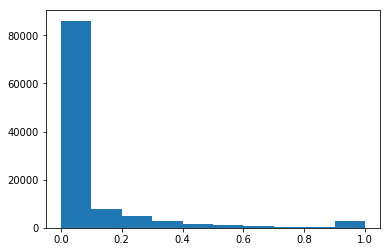

Confusion matrix, without normalization
[[53889   934  5017]
 [17310   731 10332]
 [ 7283   304 13144]]
Normalized confusion matrix
[[0.90055147 0.01560829 0.08384024]
 [0.61008705 0.02576393 0.36414901]
 [0.35130963 0.01466403 0.63402634]]


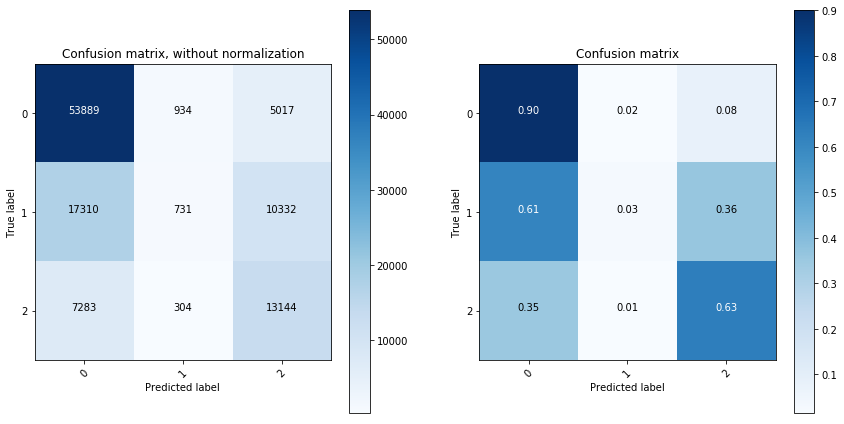

In [61]:
TFIDF_pred_labels = get_labels(TFIDF_preds, ths=[0.01, 0.05])
print("overall accuracy:", float(np.where(TFIDF_pred_labels==dev['label'])[0].shape[0])/len(TFIDF_pred_labels))
plt.figure()
plt.hist(TFIDF_preds)
plt.show()
eval_plot(TFIDF_pred_labels, dev['label'])

### avg word embedding

In [22]:
avg_embed_preds = predict(dev['s1'], dev['s2'], ptype="avg_embedding_predict")

100%|██████████| 108944/108944 [01:12<00:00, 1510.51it/s]


overall accuracy: 0.5457207372595094


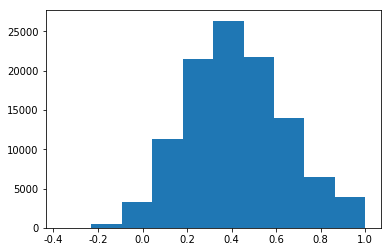

Confusion matrix, without normalization
[[38425 17493  3922]
 [10247 10041  8085]
 [ 3912  5832 10987]]
Normalized confusion matrix
[[0.64212901 0.29232955 0.06554144]
 [0.36115321 0.35389279 0.28495401]
 [0.18870291 0.28131783 0.52997926]]


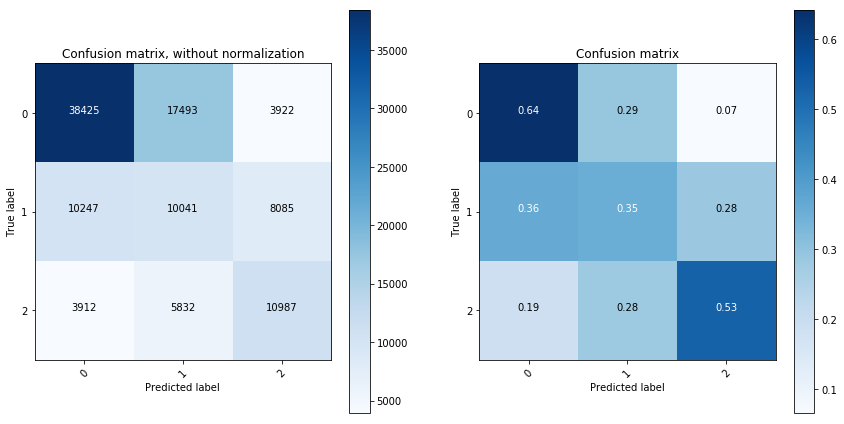

In [34]:
avg_embed_pred_labels = get_labels(avg_embed_preds, ths=[0.4, 0.6])
print("overall accuracy:", float(np.where(avg_embed_pred_labels==dev['label'])[0].shape[0])/len(avg_embed_pred_labels))
plt.figure()
plt.hist(avg_embed_preds)
plt.show()
eval_plot(avg_embed_pred_labels, dev['label'])

### IDF word embedding

In [24]:
IDF_embed_preds = predict(dev['s1'], dev['s2'], ptype="IDF_embedding_predict")

100%|██████████| 108944/108944 [01:12<00:00, 1501.97it/s]


0.5753414598325746


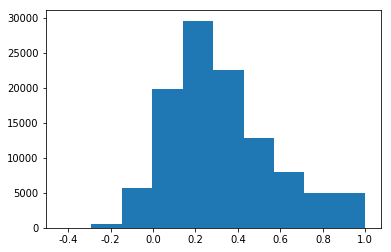

Confusion matrix, without normalization
[[43677  8740  7423]
 [10808  4935 12630]
 [ 4248  2415 14068]]
Normalized confusion matrix
[[0.72989639 0.14605615 0.12404746]
 [0.38092553 0.17393296 0.44514151]
 [0.20491052 0.11649221 0.67859727]]


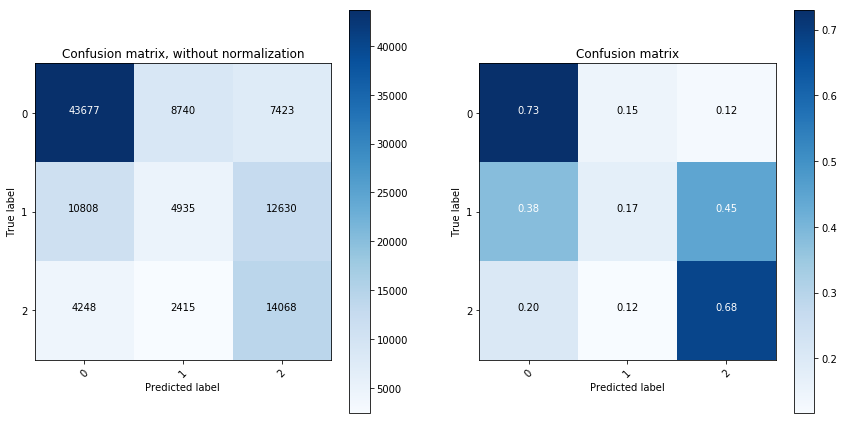

In [36]:
IDF_embed_pred_labels = get_labels(IDF_embed_preds, ths=[0.3, 0.4])
print( float(np.where(IDF_embed_pred_labels==dev['label'])[0].shape[0])/len(IDF_embed_pred_labels))
plt.figure()
plt.hist(IDF_embed_preds)
plt.show()
eval_plot(IDF_embed_pred_labels, dev['label'])

### InferSent

In [99]:
config_nli_model = {
    'n_words'        :  len(wv),
    'word_emb_dim'   :  300,
    'enc_lstm_dim'   :  512,
    'n_enc_layers'   :  1,
    'dpout_model'    :  0,
    'dpout_fc'       :  0.3,
    'fc_dim'         :  256,
    'bsize'          :  64,
    'n_classes'      :  3,
    'pool_type'      :  'max',
    'encoder_type'   :  'GRUEncoder',
    'use_cuda'       :  False,
}

In [100]:
torch.cuda.set_device(0)
np.random.seed(10)
torch.manual_seed(10)
torch.cuda.manual_seed(10)

In [101]:
from models import *
nli_net = NLINet(config_nli_model)
nli_net.load_state_dict(torch.load(os.path.join("saved_model", "model_1")))
nli_net.cuda()
print(nli_net)

NLINet(
  (encoder): GRUEncoder(
    (enc_lstm): GRU(300, 512)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.3)
    (1): Linear(in_features=2048, out_features=256, bias=True)
    (2): Tanh()
    (3): Dropout(p=0.3)
    (4): Linear(in_features=256, out_features=3, bias=True)
    (5): Softmax()
  )
)


In [102]:
eval_labels = evaluate(0, bsize = 64, eval_type='dev', final_eval=False)

100%|██████████| 1703/1703 [01:07<00:00, 25.26it/s]


togrep : results : epoch 0 ; mean accuracy dev :81.35
saving model at epoch 0


0.813537230136584
Confusion matrix, without normalization
[[52893  6124   823]
 [ 1789 18751  7833]
 [  644  3101 16986]]
Normalized confusion matrix
[[0.88390709 0.10233957 0.01375334]
 [0.0630529  0.66087478 0.27607232]
 [0.03106459 0.14958275 0.81935266]]


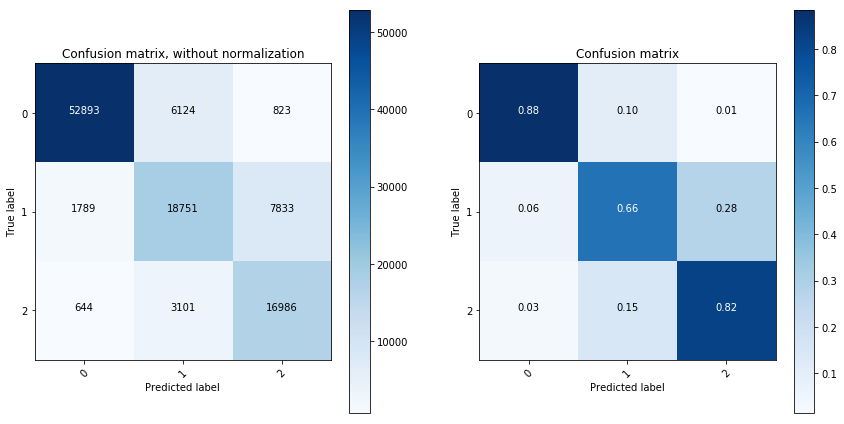

In [103]:
print( float(np.where(eval_labels==dev['label'])[0].shape[0])/len(eval_labels))
eval_plot(eval_labels, dev['label'])

## Error Analysis

In [158]:
train_df = pd.DataFrame(train)
dev_df = pd.DataFrame(dev)

### True Positive

In [162]:
inds = np.where((eval_labels==2) & (dev['label']==2))[0]
display(dev_df.loc[inds,:])

,s1,s2,label
0,我 账号 风险 了 一直 让 我 身份 认证,我 账号 风险 了 一直 让 我 身份 认证,2
31,明天 又 降 100,一 个 星期 都 不到 就 降价 了,2
32,明天 又 降 100,热水器 降价 了,2
34,明天 又 降 100,什么 情况 刚 收到 就 降价,2
35,明天 又 降 100,下单 时 899 第二 天 就 降价 了,2
37,明天 又 降 100,现在 便宜 了 退 差价 吗,2
38,明天 又 降 100,在 吗 那 款 洗衣机 怎么 又 降价 了,2
39,明天 又 降 100,我 下午 下单 早上 不到 6 点 就 降价 66 元,2
71,我的 是 自提 的 想改下 时间 可以 吗,我的 是 自提 的 想改下 时间 可以 吗,2
72,我的 是 自提 的 想改下 时间 可以 吗,自提 超期 会 怎样,2


In [126]:
s1 = "哪款 热水器 好"
s2 = "能 推荐 一 热水器"
s3 = "能 推荐 一个 电视"
s4 = "我 想买 热水器"
print(test_onePair([s1], [s2]), score_onePair([s1], [s2]))
print(test_onePair([s1], [s3]), score_onePair([s1], [s3]))
print(test_onePair([s1], [s4]), score_onePair([s1], [s4]))
print("cosine simalarity between 电视 and 热水器: ", cosine_similarity([wv['电视']], [wv['热水器']])[0][0])

2 0.6236281394958496
0 0.00022344318858813494
2 0.9318534135818481
cosine simalarity between 电视 and 热水器:  0.32491392565822147


In [145]:
s1 = "我 想 把 地址 改 到 北京"
s2 = "地址 能 改 北京"
s3 = "地址 能 改 天津"
print(test_onePair([s1], [s2]), score_onePair([s1], [s2]))
print(test_onePair([s1], [s3]), score_onePair([s1], [s3]))
print("cosine simalarity between 北京 and 天津: ", cosine_similarity([wv['北京']], [wv['天津']])[0][0])

2 0.5293948650360107
1 0.4225127398967743
cosine simalarity between 北京 and 天津:  0.6773924803246822


In [150]:
s1 = "我 把 地址 改 到 北京"
s2 = "我 能 把 改 热水器"
s3 = "我 退货"
s4 = "可以 改 退货 地址"
s6 = "我 改 退货 地址"

print(test_onePair([s1], [s2]), score_onePair([s1], [s2]))
print(test_onePair([s1], [s3]), score_onePair([s1], [s3]))
print(test_onePair([s1], [s4]), score_onePair([s1], [s4]))
print(test_onePair([s1], [s6]), score_onePair([s1], [s6]))

0 3.349576945765875e-05
0 4.3610962165985256e-05
0 0.20184412598609924
0 0.3590293228626251


### False Negative

In [161]:
inds = np.where((eval_labels==0) & (dev['label']==2))[0]
display(dev_df.loc[inds,:])

,s1,s2,label
33,明天 又 降 100,冰箱 有 价 保 嘛,2
403,可以 帮我 发 顺丰 加急 吗,是 快递 还是,2
406,可以 帮我 发 顺丰 加急 吗,支持 什么 快递,2
1175,所有 商品 都 可以 用 云钻嘛,什么 叫 扣除 云砖 抵扣 金额,2
1320,你 好 我 购物车 有 个 手机 单 点 支付 老是 无法 支付,易付宝 密码 输入 了 几 次 都 没 效果,2
1443,我 要 改 地址,能 帮我 改 一下 预留 手机号 么,2
1446,我 要 改 地址,修改 送货 订单,2
1478,大 聚会 产品 有 哪些,我 想 买 大 聚会 的 商品,2
1766,在 哪 看 理财 什么 时候 到期,理财 到期 后 资金 到 银行卡 吗,2
2661,如何 解除 苏宁 易 购 与 苏宁 金融 的 绑定,请 问 怎么 解除 易 宝付,2


In [151]:
s1 = "什么 时候 退款 到账"
s2 = "怎么 还不 退款"
s3 = "怎么 还不 退款 烂 透"
print(test_onePair([s1], [s2]), score_onePair([s1], [s2]))
print(test_onePair([s1], [s3]), score_onePair([s1], [s3]))

2 0.9444000720977783
0 0.00024094815307762474


In [152]:
s1 = "买的 空调 可以 晚 几天 送"
s2 = "怎么 更改 送货 时间"
s3 = "什么 时候 送"
print(test_onePair([s1], [s2]), score_onePair([s1], [s2]))
print(test_onePair([s1], [s3]), score_onePair([s1], [s3]))

2 0.5389209389686584
1 0.4672958552837372


In [90]:
s1 = "货 我 已经 收到 我 不知道 怎么 签收"
s2 = "在哪 确认 收货"
s3 = "支持 开箱 验 机"
print(test_onePair([s1], [s2]), score_onePair([s1], [s2]))
print(test_onePair([s1], [s3]), score_onePair([s1], [s3]))

0
1


In [155]:
s1 = "建议 你 可以 提前 拨打 一下 预约 安装"
s2 = "可以 预约 收货 当天 安装 吗 "
s3 = "下单 可以 确认 安装 服务 下单 后 可 通过 以下 链接 确认 服务 信息 或 预约 更改 服务 时间 商家 安装 问题 请 优先 联系 商家 客服"
s4 = "你 帮 我 看看 这 快递 到 哪 了 "
print(test_onePair([s1], [s2]), score_onePair([s1], [s2]))
print(test_onePair([s1], [s3]), score_onePair([s1], [s3]))
print(test_onePair([s1], [s4]), score_onePair([s1], [s4]))

2 0.630161702632904
2 0.6261618137359619
0 5.3847197705181316e-05


## Response Sim

In [ ]:
temp_df = pd.read_csv("samples_tokenized.csv", header=None)
temp_df.columns = ['s']

In [67]:
response_df = pd.DataFrame()

In [68]:
response_df['s1'] = temp_df[temp_df.index%2==0].reset_index(drop=True)['s']
response_df['s2'] = temp_df[temp_df.index%2==1].reset_index(drop=True)['s']
response_df['true_label'] = pd.Series(np.append( [2]*16, [[0]*16, [0]*16]).astype(int))

In [72]:
def label_temp(pred, ths):
    if pred<ths[0]:
        return 0
    elif pred<ths[1]:
        return 0
    else:
        return 2
response_df['tfidf_sim'] = response_df[['s1','s2']].apply(lambda x: label_temp(TF_IDF_predict(x[0], x[1]), [0.2,0.3]), axis=1)
response_df['avg_embed_sim'] = response_df[['s1','s2']].apply(lambda x: label_temp(avg_embedding_predict(x[0],x[1]), [0.3,0.6]), axis=1)
response_df['idf_embed_sim'] = response_df[['s1','s2']].apply(lambda x: label_temp(IDF_embedding_predict(x[0], x[1]), [0.3,0.4]), axis=1)
response_df['net_sim'] = response_df[['s1','s2']].apply(lambda x: 2 if test_onePair([x[0]], [x[1]])>=1 else 0, axis=1)

In [79]:
display(response_df)

,s1,s2,true_label,tfidf_sim,avg_embed_sim,idf_embed_sim,net_sim
0,建议 你 可以 提前 拨 打 预约 安装,﻿下单 时 可以 确认 安装 服务 方 下单 通过 以下 链接 确认 服务 信息 预约 更改 服务 时间 商家 安装 问题 优先 联系 商家 客服,2,0,2,2,2
1,﻿不 客气 亲爱 哒,﻿不 客气 亲爱 哒 很 高兴 服务 感谢 对 苏宁 易购 支持 对 我 服务 满意 记 给我 赞,2,2,0,2,0
2,﻿苏宁 配送 商 点 击 自助 修改 配送 信 息,﻿苏宁 发货 可以 自主 修改 指定 送达时间 在线 支付 最多 延迟 45天 货到付款 最多 延迟 7天 点 击 修改 非 苏宁 发货 商品 建议 联系 购买 页面 在线客服 修改,2,0,0,2,2
3,﻿商品 发货 出 库 但是 最近 几天 做 活动 单 量 比较 多 送货 有些 慢 送货 时间 会 有所 延迟 但是 放心 物流 在 加急 安排 拣 货 和 配送 到 站 优先 送 辛苦,﻿通过 点 击 查询 物流 苏宁 发货 商品 24小时 内 发货 非 苏宁 发货 商品 48小时 内 发货 实际 送达时间,2,0,2,2,0
4,﻿最近 几天 做 活动 单 量 比较 多 送货 有些 慢 送货 时间 会 有所 延迟 但是 放心 物流 在 加急 安排 拣 货 和 配送 到 站 优先 送 辛苦,﻿苏宁 发货 商品 页面 会 显示 预计 到达 时间 提交 订单 时 显示 时间 下单 按照 指定 日期 配送 非 苏宁 发货 商品 下单 在 48小时 内 发货 快递 信息 点 击 查询 当...,2,0,2,2,2
5,﻿苏宁 易购 所 出售 商品 均 正 品行 货 放心 选购,﻿苏宁 易购 所 出售 商品 均 正 品行 货 均 来自 正规 渠道 带 正规 机 打 发票 享受 国家 三包 服务 质量 和 售后服务 与 门店 完全 相同 放心 选购,2,2,2,2,2
6,﻿有 统一 全国 售后服务 正品 质量 保证,﻿苏宁 易购 与 天猫 苏宁 官方 旗舰 店 只是 销售 平台 不同 但 均 苏宁 销售 并发 货 有 统一 全国 售后服务 正品 质量 保证,2,2,2,2,2
7,﻿苏宁 发货 商品 下单 填写 地址 时 能 正常 保存 在 配送 范围 内 支持 送货上门 服务,﻿苏宁 发货 商品 下单 填写 地址 时 能 正常 保存 在 配送 范围 内 支持 送货上门 服务 非 苏宁 发货 商品 建议 联系 面上 在线客服 确定 配送 范围,2,2,2,2,2
8,﻿7天 之 内 只 要 符合 条 件 可以 进行 补差,﻿在 苏宁 易购 购买 自营商品 收货 前 收货 次日 起 七天 内 发现 同一 城市 同一 销售 渠道 商品 售价 低于 购买 时 价格 提交 七天 贵就赔 申请 苏宁 将 依据 本 政策 ...,2,0,0,2,2
9,﻿苏宁 在线 支付 立减 金额 随机 最高 100元 最低 0元,﻿绑定 银行卡 首次 支付 在 提交 订单 支付 时 会有 提示 显示 减价 任性付 支付 立减 立减 金额 随机 最高 100元 最低 0元 立减 0元 说明 此次 优惠 没有 获得 优惠 ...,2,2,2,2,2


In [ ]:
eval_plot(response_df['tfidf_sim'], response_df['true_label'])

Confusion matrix, without normalization
[[22 10]
 [ 6 10]]
Normalized confusion matrix
[[0.6875 0.3125]
 [0.375  0.625 ]]


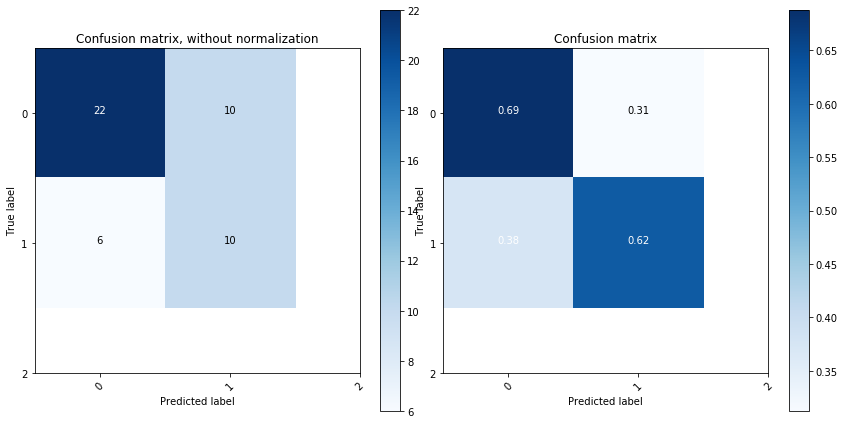

In [251]:
eval_plot(response_df['avg_embed_sim'], response_df['true_label'])

Confusion matrix, without normalization
[[19 13]
 [ 2 14]]
Normalized confusion matrix
[[0.59375 0.40625]
 [0.125   0.875  ]]


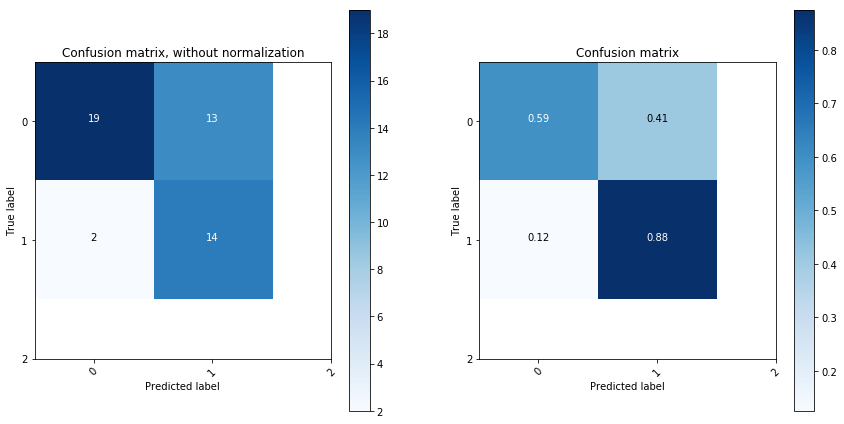

In [77]:
eval_plot(response_df['idf_embed_sim'], response_df['true_label'])

Confusion matrix, without normalization
[[22 10]
 [ 4 12]]
Normalized confusion matrix
[[0.6875 0.3125]
 [0.25   0.75  ]]


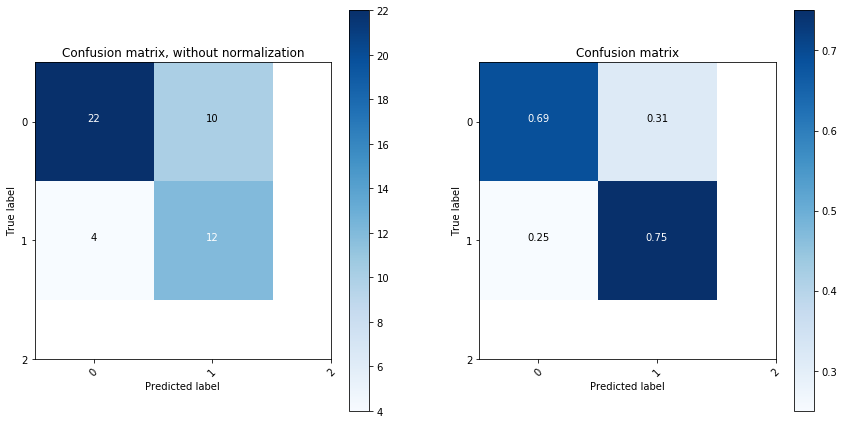

In [78]:
eval_plot(response_df['net_sim'], response_df['true_label'])